# PROYECTO 2


### INTEGRANTES
Luisa María Hernández Quintero

Carolina Taborda Vargas

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter

### Inspección del archivo y carga en python 

In [10]:
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2) #Leer el excel 
print(tabulate(df, headers='keys', tablefmt='github', showindex=True))

|      | SubjectID   |   Unnamed: 1 |   T_offset1 |   Max1R13_1 |   Max1L13_1 |   aveAllR13_1 |   aveAllL13_1 |   T_RC1 |   T_RC_Dry1 |   T_RC_Wet1 |   T_RC_Max1 |   T_LC1 |   T_LC_Dry1 |   T_LC_Wet1 |   T_LC_Max1 |   RCC1 |   LCC1 |   canthiMax1 |   canthi4Max1 |   T_FHCC1 |   T_FHRC1 |   T_FHLC1 |   T_FHBC1 |   T_FHTC1 |   T_FH_Max1 |   T_FHC_Max1 |   T_Max1 |   T_OR1 |   T_OR_Max1 |   Unnamed: 29 |   T_offset2 |   Max1R13_2 |   Max1L13_2 |   aveAllR13_2 |   aveAllL13_2 |   T_RC2 |   T_RC_Dry2 |   T_RC_Wet2 |   T_RC_Max2 |   T_LC2 |   T_LC_Dry2 |   T_LC_Wet2 |   T_LC_Max2 |   RCC2 |   LCC2 |   canthiMax2 |   canthi4Max2 |   T_FHCC2 |   T_FHRC2 |   T_FHLC2 |   T_FHBC2 |   T_FHTC2 |   T_FH_Max2 |   T_FHC_Max2 |   T_Max2 |   T_OR2 |   T_OR_Max2 |   Unnamed: 57 |   T_offset3 |   Max1R13_3 |   Max1L13_3 |   aveAllR13_3 |   aveAllL13_3 |   T_RC3 |   T_RC_Dry3 |   T_RC_Wet3 |   T_RC_Max3 |   T_LC3 |   T_LC_Dry3 |   T_LC_Wet3 |   T_LC_Max3 |   RCC3 |   LCC3 |   canthiMax3 |   canthi4Max3 |  

#### COMPARACIÓN ENTRE LAS DIFERENTES ZONAS CON LA TEPERATURA ORAL

In [11]:
#Comparación de las cuatro zonas. Promedio de cada una para comparar con aveOralM
import pandas as pd
from scipy.stats import ttest_ind #importamos esta función para hacer una prueba t de muestras pareadas para comprar la temperatura oral con las demás.
from tabulate import tabulate

# Leer el archivo Excel
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2)

# Calcular los promedios de las cuatro zonas térmicas
columna1 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
columna2 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1)
columna3 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1)
columna4 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1)

#VARIBALE DE aveORALM
list_1=df['aveOralM'].tolist()

# Crear nuevo DataFrame con los promedios
df_promedio = pd.DataFrame({
    'Prom_Max1R13': columna1,
    'Prom_Max1L13': columna2,
    'Prom_T_Max': columna3,
    'Prom_TF_HCC': columna4
})

# Mostrar tabla con promedios
print("Promedios de las zonas térmicas:\n")
print(tabulate(df_promedio, headers='keys', tablefmt='github', showindex=True))

#PRUEBA T PARA DOS MUESTRAS : PARA COMPARAR AVEORAL VS. TEMPERATURAS

def t_test_two_sample(nombre, datos1, datos2):
    """
    nombre: descripción de la comparación (str)
    datos1: datos de la primera muestra 
    datos2: datos de la segunda muestra
    """
    t_stat, p_value = ttest_ind(datos1, datos2)
    print(f"{nombre} Estadístico t: {t_stat:.4f}, valor p: {p_value:.10f}")


#COMPARACIÓN ENTRE aveORALM y prom_Max1R13_
ave_max1R = t_test_two_sample("aveOralM vs Max1R13", list_1, columna1)

#COMPARACIÓN ENTRE aveORALM y prom_Max1L13_
ave_max1L = t_test_two_sample("aveOralM vs Max1L13", list_1, columna2)

#COMPARACIÓN ENTRE aveORALM y prom_T_Max
ave_Tmax  = t_test_two_sample("aveOralM vs T_Max", list_1, columna3)

#COMPARACIÓN ENTRE aveORALM y prom_TF_HCC
ave_TF    = t_test_two_sample("aveOralM vs TF_HCC", list_1, columna4)

#REVISAR SI EN SERIO EL VALOR P DA CERO :C

Promedios de las zonas térmicas:

|      |   Prom_Max1R13 |   Prom_Max1L13 |   Prom_T_Max |   Prom_TF_HCC |
|------|----------------|----------------|--------------|---------------|
|    0 |        35.03   |        35.3775 |      35.6925 |       33.5775 |
|    1 |        34.55   |        34.52   |      35.175  |       34.0325 |
|    2 |        35.6525 |        35.5175 |      35.9125 |       34.9    |
|    3 |        35.2225 |        35.6125 |      35.72   |       34.44   |
|    4 |        35.545  |        35.665  |      35.895  |       35.09   |
|    5 |        35.1325 |        35.2025 |      35.85   |       34.1925 |
|    6 |        35.2825 |        35.615  |      35.8375 |       33.4775 |
|    7 |        35.105  |        34.87   |      35.68   |       33.7275 |
|    8 |        35.3075 |        35.4225 |      35.8525 |       35.1475 |
|    9 |        35.89   |        35.765  |      36.205  |       35.255  |
|   10 |        35.275  |        35.2    |      35.805  |       34.0325 |
|   

### ANÁLISIS EXPLORATORIO DE DATOS

Se realiza el análisis exploratorio de los datos que no se analizaron en el proyecto 1


In [12]:
#ANTES DE HACER EL ANÁLISIS DE DATOS, DEBEMOS CONVERTIR LOS VALORES EN LAS COLUMNAS DE TIME A VALORES ENTEROS 
# Versión mejorada con limpieza de datos

def time_conversion(time_str):
    try:
        # Eliminar espacios y caracteres extraños
        clean_str = ''.join(c for c in str(time_str) if c.isdigit() or c == ':')
        
        # Manejar casos donde falten segundos (HH:MM)
        parts = list(map(int, clean_str.split(':')))
        if len(parts) == 2:  # Si solo tiene horas y minutos
            h, m = parts
            s = 0
        elif len(parts) == 3:  # Formato completo HH:MM:SS
            h, m, s = parts
        else:
            return np.nan
            
        return h * 3600 + m * 60 + s
    except:
        return np.nan

# Aplicar conversión robusta
r=df['Time_seconds'] = df['Time'].apply(time_conversion)
print(r)

# Verificar valores problemáticos
if df['Time_seconds'].isna().sum() > 0:
    print("\n[VALORES PROBLEMÁTICOS EN TIME]")
    problematic = df[df['Time_seconds'].isna() & df['Time'].notna()]
    print(f"Se encontraron {len(problematic)} valores no convertidos")
    print("Ejemplos:")
    print(problematic['Time'].head().to_dict())

0       45826
1       55368
2       57176
3       58073
4       59286
        ...  
1015    46330
1016    53505
1017    44091
1018    62265
1019    56750
Name: Time, Length: 1020, dtype: int64


In [13]:
#VARIABLES NUEVAS
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt  # Asegurarse de importar matplotlib

# Cargar datos 
list_9 = df["aveOralF"].dropna().tolist()
list_10 = df['Distance'].tolist()
list_11 = list_11 = (pd.to_datetime(df['Date'], errors='coerce').astype('int64') // 10**9).tolist() #La columna de date también se debe convertir a un entero 
list_12 = df['Time'].apply(time_conversion).tolist()

#PROMEDIOS DE TEMPERATURAS (SUPONGO QUE TAMBIÉN SE PONEN AQUÍ)
list_13 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1).tolist()
list_14 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1).tolist()
list_15 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1).tolist()
list_16 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1).tolist()

#DATAFRAME DE VARIABLES A ANALIZAR
variables_nuevas = {   #Hacer un diccionario con que tenga como llaves los nombres de las variables y se le asigne las listas creadas en el anterior paso 
    'aveOralF': list_9,
    'Distance': list_10,
    'Date': list_11,
    'Time': list_12,
    'Prom_Max1R13': list_13,
    'Prom_Max1L13': list_14,
    'Prom_T_Max': list_15,
    'Prom_TF_HCC': list_16
    
}

# Esta parte del codigo solo es para mostrar el data frame con las variables a analizar, no se usa para el codigo 
p=pd.DataFrame(variables_nuevas)
print(tabulate(p, headers='keys', tablefmt='github', showindex=True))


|      |   aveOralF |   Distance |         Date |   Time |   Prom_Max1R13 |   Prom_Max1L13 |   Prom_T_Max |   Prom_TF_HCC |
|------|------------|------------|--------------|--------|----------------|----------------|--------------|---------------|
|    0 |      36.85 |       0.8  |  1.51079e+09 |  45826 |        35.03   |        35.3775 |      35.6925 |       33.5775 |
|    1 |      37    |       0.8  |  1.51079e+09 |  55368 |        34.55   |        34.52   |      35.175  |       34.0325 |
|    2 |      37.2  |       0.8  |  1.51079e+09 |  57176 |        35.6525 |        35.5175 |      35.9125 |       34.9    |
|    3 |      36.85 |       0.8  |  1.51079e+09 |  58073 |        35.2225 |        35.6125 |      35.72   |       34.44   |
|    4 |      36.8  |       0.8  |  1.51079e+09 |  59286 |        35.545  |        35.665  |      35.895  |       35.09   |
|    5 |      36.9  |       0.8  |  1.51079e+09 |  60208 |        35.1325 |        35.2025 |      35.85   |       34.1925 |
|    6 |

### ANÁLISIS EXPLORATORIO DE DATOS DEL PROYECTO 1

In [14]:
#HACEMOS UN DATAFRAME CON LAS VARIABLES DEL PROYECTO 1 Y 2 JUNTAS 

list_1 = df['aveOralM'].tolist()
list_2 = df['Gender'].tolist()
list_3 = df['Age'].tolist()
list_4 = df['Ethnicity'].tolist()
list_5 = df['T_atm'].tolist()
list_6 = df['Humidity'].tolist()
list_7 = df['Cosmetics'].map({1: "Cosmético aplicado", 0: "No aplicado"}).tolist()

#Código para calcular el promedio de Max1R13
columna=df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1).tolist() #Llamar todas la columnas de Max1R13 y sacar el promedio  
df_promedio = pd.DataFrame(columna, columns=['promedio_max'])


list_8=df_promedio['promedio_max'].tolist()
list_9 = df["aveOralF"].dropna().tolist()
list_10 = df['Distance'].tolist()
list_11 = list_11 = (pd.to_datetime(df['Date'], errors='coerce').astype('int64') // 10**9).tolist() #La columna de date también se debe convertir a un entero 
list_12 = df['Time'].apply(time_conversion).tolist()
list_13 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1).tolist()
list_14 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1).tolist()
list_15 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1).tolist()
list_16 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1).tolist()

All = {
    'aveOralM': list_1,
    'Gender': list_2,
    'Age': list_3,
    'Ethnicity': list_4,
    'T_atm': list_5,
    'Humidity': list_6,
    'Cosmetics': list_7,
    'promedio_Max1R13_': list_8,
    'aveOralF': list_9,
    'Distance': list_10,
    'Date': list_11,
    'Time': list_12,
    'Prom_Max1R13': list_13,
    'Prom_Max1L13': list_14,
    'Prom_T_Max': list_15,
    'Prom_TF_HCC': list_16
}

new = pd.DataFrame(All)
print(tabulate(new, headers='keys', tablefmt='github', showindex=True))

|      |   aveOralM | Gender   | Age   | Ethnicity                         |   T_atm |   Humidity | Cosmetics          |   promedio_Max1R13_ |   aveOralF |   Distance |        Date |   Time |   Prom_Max1R13 |   Prom_Max1L13 |   Prom_T_Max |   Prom_TF_HCC |
|------|------------|----------|-------|-----------------------------------|---------|------------|--------------------|---------------------|------------|------------|-------------|--------|----------------|----------------|--------------|---------------|
|    0 |      36.59 | Male     | 41-50 | White                             |    24   |       28   | nan                |             35.03   |      36.85 |       0.8  |  1510790400 |  45826 |        35.03   |        35.3775 |      35.6925 |       33.5775 |
|    1 |      37.19 | Female   | 31-40 | Black or African-American         |    24   |       26   | nan                |             34.55   |      37    |       0.8  |  1510790400 |  55368 |        34.55   |        34.52   |    

### ANÁLISIS DE OUTLIERS O DATOS ATÍPICOS


 ANÁLISIS DE OUTLIERS: AVEORALF
• Valores totales: 1020 | Válidos: 1020
• Número de outliers: 60

Outliers detectados:
|   Índice |   Valor |
|----------|---------|
|       66 |   37.75 |
|       72 |   37.65 |
|       81 |   38.55 |
|       98 |   37.75 |
|      104 |   37.7  |
|      122 |   39.6  |
|      139 |   38    |
|      155 |   38.5  |
|      156 |   39.3  |
|      261 |   38.3  |
|      262 |   38.3  |
|      301 |   38.15 |
|      329 |   36.3  |
|      384 |   38.15 |
|      477 |   36    |
|      487 |   38.7  |
|      490 |   38.7  |
|      522 |   37.65 |
|      533 |   37.85 |
|      560 |   37.6  |
|      625 |   35.75 |
|      645 |   39.2  |
|      648 |   38.95 |
|      650 |   37.6  |
|      653 |   37.6  |
|      671 |   36.05 |
|      674 |   36    |
|      688 |   38.15 |
|      691 |   38.25 |
|      697 |   37.6  |
|      699 |   37.6  |
|      707 |   38    |
|      709 |   37.85 |
|      712 |   39.05 |
|      731 |   38.45 |
|      753 |   38.15 |
|     

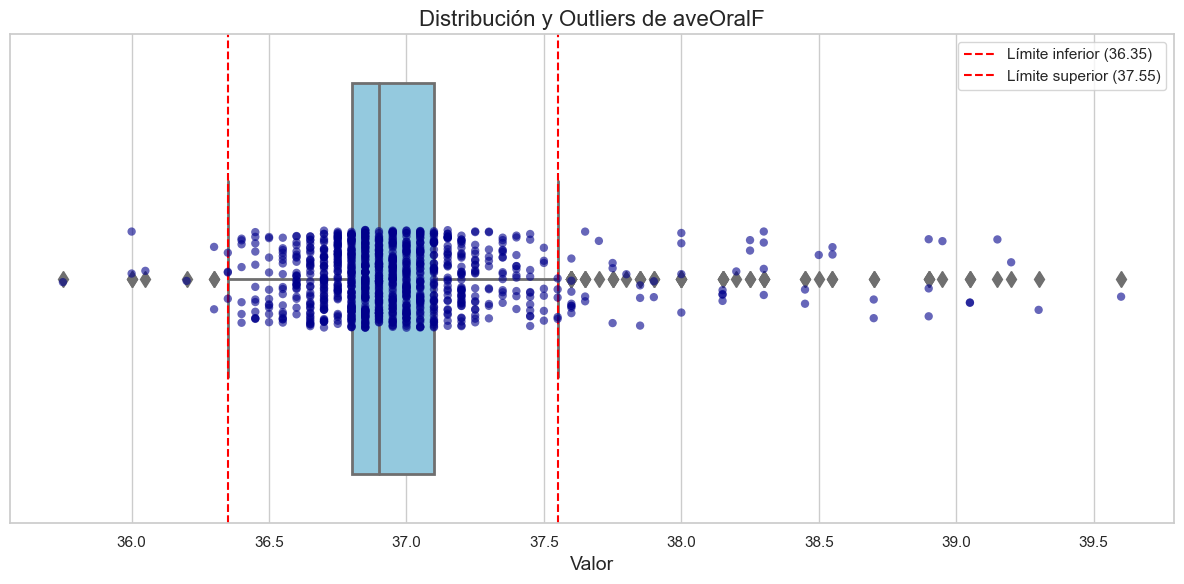


 ANÁLISIS DE OUTLIERS: DISTANCE
• Valores totales: 1020 | Válidos: 1018
• Número de outliers: 6

Outliers detectados:
|   Índice |   Valor |
|----------|---------|
|       72 |    0.9  |
|       97 |   79    |
|      112 |    0.92 |
|      190 |    0.85 |
|      200 |    0.85 |
|      223 |    0.85 |


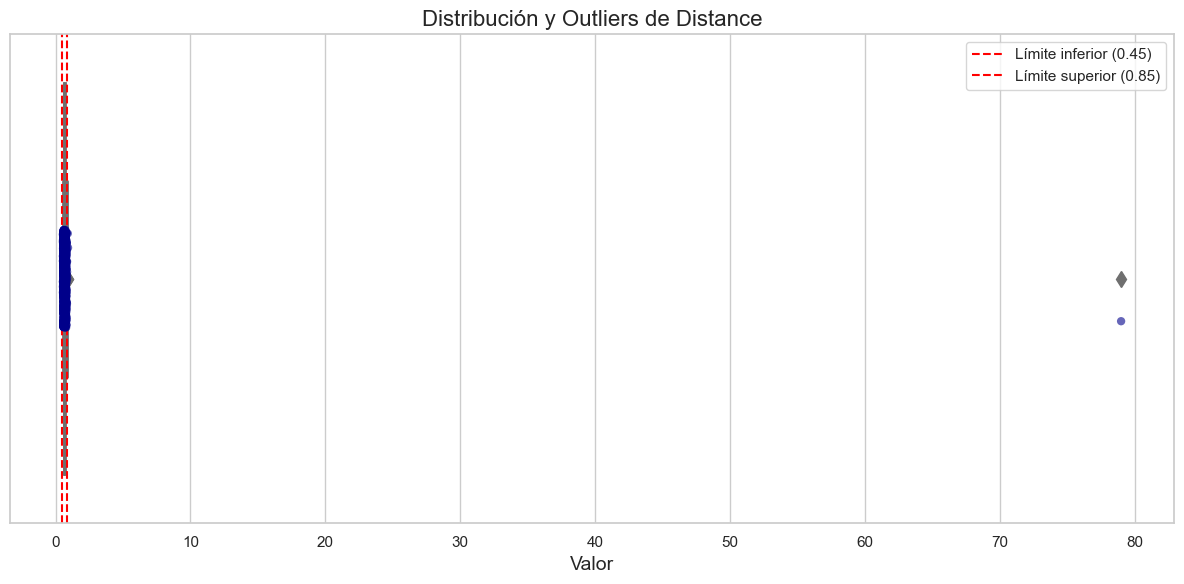


 ANÁLISIS DE OUTLIERS: DATE (TIMESTAMP)
• Valores totales: 1020 | Válidos: 1020
• Número de outliers: 50

Outliers detectados:
|   Índice |        Valor |
|----------|--------------|
|       15 | -1.23474e+09 |
|       16 | -1.23474e+09 |
|      264 | -1.25582e+09 |
|      265 | -1.25582e+09 |
|      266 | -1.25582e+09 |
|      267 | -1.25582e+09 |
|      268 | -1.25582e+09 |
|      269 | -1.22429e+09 |
|      270 | -1.22429e+09 |
|      271 | -1.22429e+09 |
|      272 | -1.22429e+09 |
|      273 | -1.22429e+09 |
|      274 | -1.22429e+09 |
|      275 | -1.22429e+09 |
|      276 | -1.22429e+09 |
|      277 | -1.22429e+09 |
|      476 | -1.23733e+09 |
|      477 | -1.23733e+09 |
|      478 | -1.23733e+09 |
|      479 | -1.23733e+09 |
|      480 | -1.23733e+09 |
|      481 | -1.23733e+09 |
|      482 | -1.23733e+09 |
|      483 | -1.23733e+09 |
|      484 | -1.23733e+09 |
|      485 | -1.23733e+09 |
|      486 | -1.23733e+09 |
|      487 | -1.23733e+09 |
|      488 | -1.2058e+09  |
|   

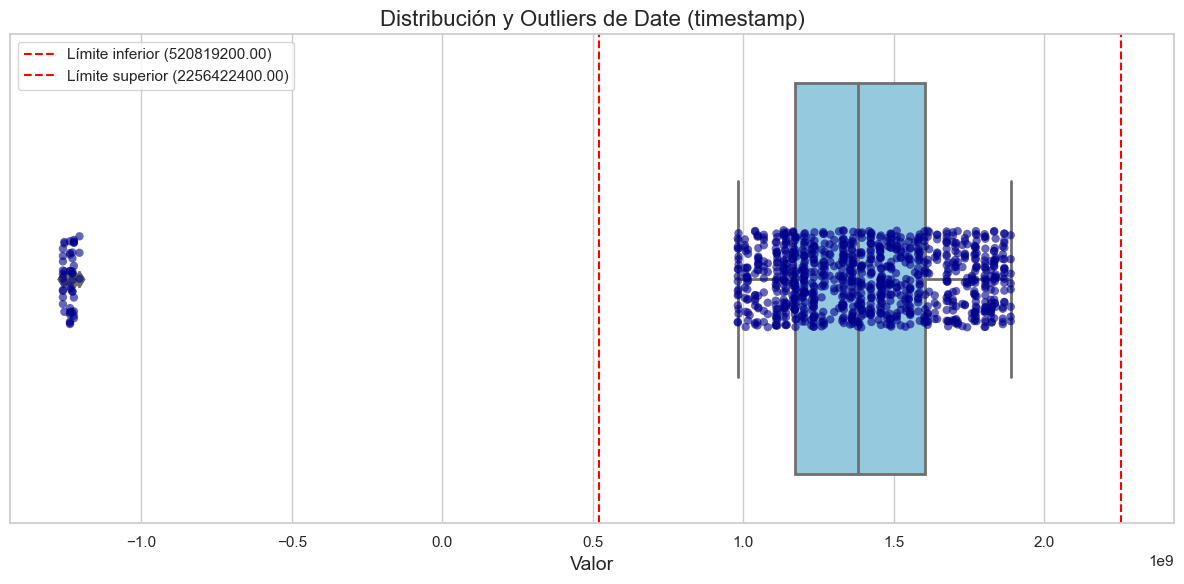


 ANÁLISIS DE OUTLIERS: TIME (SEGUNDOS)
• Valores totales: 1020 | Válidos: 1020
• Número de outliers: 0


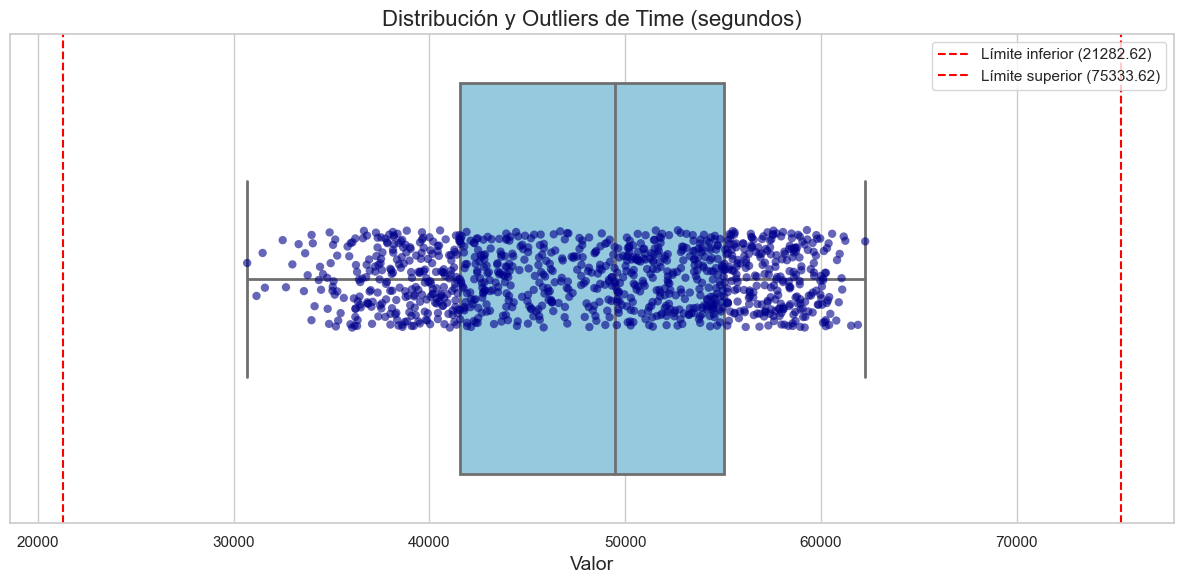


 ANÁLISIS DE OUTLIERS: PROM_MAX1L13
• Valores totales: 1020 | Válidos: 1020
• Número de outliers: 43

Outliers detectados:
|   Índice |   Valor |
|----------|---------|
|       81 | 36.9425 |
|      122 | 38.03   |
|      132 | 37.17   |
|      136 | 37.325  |
|      149 | 34.3475 |
|      156 | 37.455  |
|      261 | 37.9225 |
|      262 | 37.175  |
|      274 | 34.26   |
|      292 | 37.38   |
|      358 | 36.975  |
|      374 | 34.345  |
|      490 | 36.92   |
|      495 | 37.6625 |
|      533 | 37.08   |
|      645 | 37.9375 |
|      648 | 37.93   |
|      688 | 37.4425 |
|      691 | 36.93   |
|      697 | 37.1425 |
|      708 | 37.0675 |
|      712 | 37.13   |
|      721 | 37.075  |
|      731 | 36.955  |
|      751 | 36.9925 |
|      753 | 37.2975 |
|      761 | 37.2925 |
|      770 | 37.225  |
|      774 | 36.82   |
|      785 | 36.9875 |
|      799 | 38.0425 |
|      800 | 37.3675 |
|      813 | 34.1225 |
|      837 | 36.985  |
|      839 | 37.225  |
|      844 | 37.095  |
| 

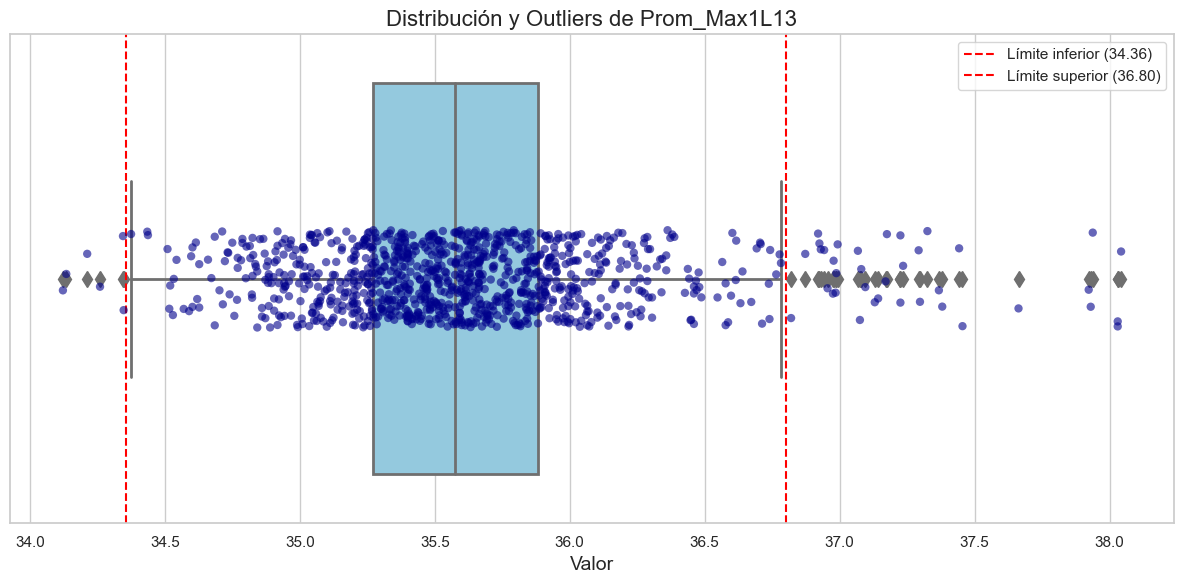


 ANÁLISIS DE OUTLIERS: PROM_T_MAX
• Valores totales: 1020 | Válidos: 1020
• Número de outliers: 57

Outliers detectados:
|   Índice |   Valor |
|----------|---------|
|       14 | 37.11   |
|       72 | 37.57   |
|       78 | 37.4567 |
|       81 | 37.4675 |
|      122 | 38.8075 |
|      132 | 37.43   |
|      136 | 37.7775 |
|      139 | 37.07   |
|      155 | 37.0775 |
|      156 | 37.7025 |
|      166 | 34.9825 |
|      205 | 34.9525 |
|      261 | 37.9425 |
|      262 | 37.6325 |
|      292 | 37.76   |
|      301 | 37.745  |
|      314 | 37.21   |
|      358 | 37.2625 |
|      477 | 34.8925 |
|      487 | 37.415  |
|      490 | 37.96   |
|      495 | 37.7275 |
|      533 | 37.51   |
|      645 | 38.1775 |
|      648 | 38.3225 |
|      650 | 37.205  |
|      686 | 37.15   |
|      688 | 37.4725 |
|      691 | 37.3425 |
|      697 | 37.32   |
|      708 | 37.1275 |
|      709 | 37.4525 |
|      712 | 37.975  |
|      721 | 37.075  |
|      731 | 37.46   |
|      749 | 37.1467 |
|   

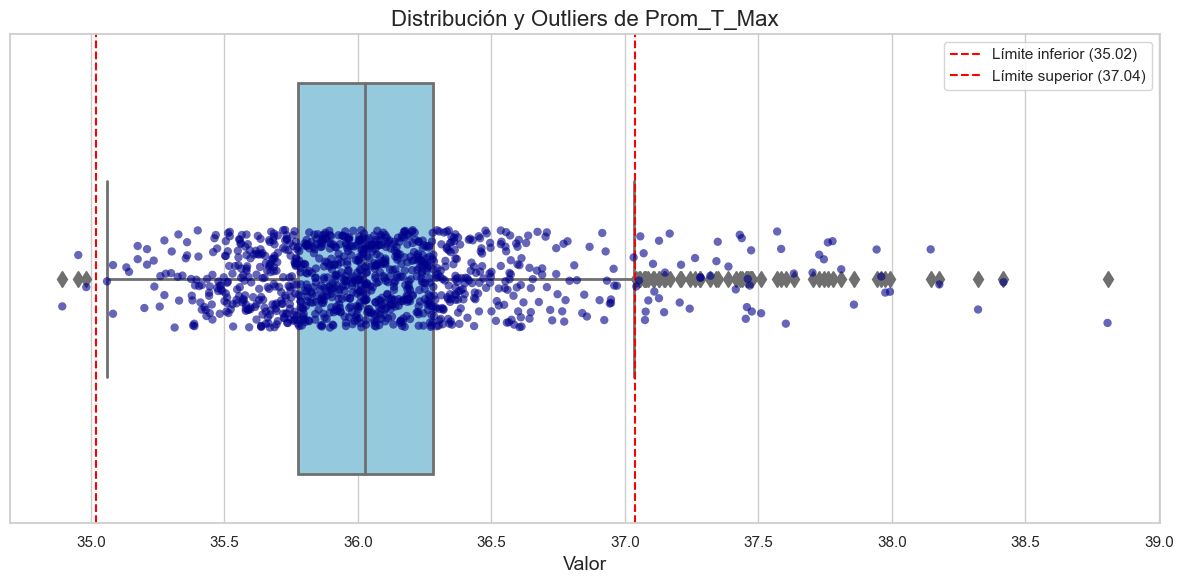


 ANÁLISIS DE OUTLIERS: PROM_TF_HCC
• Valores totales: 1020 | Válidos: 1020
• Número de outliers: 37

Outliers detectados:
|   Índice |   Valor |
|----------|---------|
|       81 | 36.2875 |
|       99 | 32.18   |
|      122 | 36.74   |
|      132 | 36.32   |
|      149 | 31.38   |
|      156 | 36.165  |
|      159 | 32.8525 |
|      166 | 31.05   |
|      215 | 31.7425 |
|      230 | 32.0925 |
|      261 | 36.5875 |
|      272 | 31.99   |
|      292 | 36.135  |
|      303 | 32.86   |
|      374 | 32.7925 |
|      389 | 32.98   |
|      490 | 36.53   |
|      545 | 32.97   |
|      560 | 36.2933 |
|      613 | 31.9825 |
|      624 | 33      |
|      628 | 32.825  |
|      645 | 36.195  |
|      654 | 32.97   |
|      661 | 32.735  |
|      709 | 36.34   |
|      712 | 36.81   |
|      761 | 36.24   |
|      785 | 36.49   |
|      799 | 37.125  |
|      800 | 36.56   |
|      874 | 36.89   |
|      924 | 32.71   |
|      940 | 32.875  |
|      947 | 33.015  |
|      998 | 36.1675 |
|  

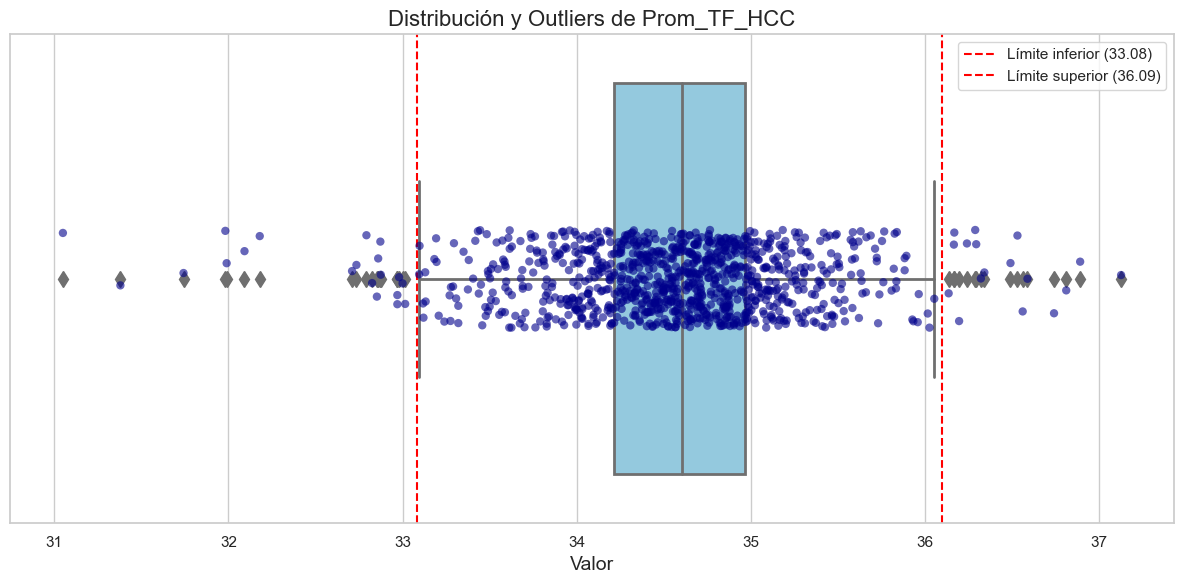

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

def analizar_outliers_con_grafico(serie, nombre):
    datos = np.array(serie)
    datos_validos = datos[~np.isnan(datos)]

    if len(datos_validos) == 0:
        print(f"\n{nombre}: Todos los valores son NaN")
        return

    # Cálculo de outliers
    Q1, Q3 = np.percentile(datos_validos, [25, 75])
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = datos_validos[(datos_validos < lim_inf) | (datos_validos > lim_sup)]
    n_outliers = len(outliers)

    # Resultados
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DE OUTLIERS: {nombre.upper()}")
    print(f"• Valores totales: {len(serie)} | Válidos: {len(datos_validos)}")
    print(f"• Número de outliers: {n_outliers}")

    if n_outliers > 0:
        indices_outliers = np.where((datos < lim_inf) | (datos > lim_sup))[0]
        df_outliers = pd.DataFrame({
            'Índice': indices_outliers,
            'Valor': datos[indices_outliers]
        })
        print("\nOutliers detectados:")
        print(tabulate(df_outliers, headers='keys', tablefmt='github', showindex=False))

    # Gráfico mejorado
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Boxplot con seaborn
    ax = sns.boxplot(x=datos_validos, color='skyblue', fliersize=8, linewidth=2)

    sns.stripplot(x=datos_validos, color='darkblue', size=6, jitter=True, alpha=0.6)

    # Líneas para límites de outliers
    plt.axvline(lim_inf, color='red', linestyle='--', label=f'Límite inferior ({lim_inf:.2f})')
    plt.axvline(lim_sup, color='red', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')

    plt.title(f'Distribución y Outliers de {nombre}', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

#como ya sabemos por el proyecto 1 que las variables aveORALM, T_atm y Humidity tienen outliers, se le aplica la función unicamente a las del proyecto 2
analizar_outliers_con_grafico(list_9, 'aveOralF')
analizar_outliers_con_grafico(list_10, 'Distance')
analizar_outliers_con_grafico(list_11, 'Date (timestamp)')
analizar_outliers_con_grafico(list_12, 'Time (segundos)')
analizar_outliers_con_grafico(list_14, 'Prom_Max1L13')
analizar_outliers_con_grafico(list_15, 'Prom_T_Max')
analizar_outliers_con_grafico(list_16, 'Prom_TF_HCC')


### TRATAMIENTO DE DATOS
Se ha encontrado que las columnas: Date, aveORALF y Distance presentan datos atípicos, es por ello que se busca hacer una transformación a estos datos. Sin embargo, la columna de Date presenta algunos datos negativos luego de hacer la transformación a enteros. 
Para interpretar valores negativos, hacemos la transformación por medio de la prueba de Yeo Johnson para la columna Date y para las variables de aveORALF y Distance, se implementa la transformación de box-cox (esto en cuanto a las variables del proyecto 2). En cuanto al punto 1, tenemos que los datos atípicos están presentes en las variables aveOralM, T_atm, Humidity y promedio de Max1R13_ a las cuales se les hará transformación box-cox


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from tabulate import tabulate

def aplicar_boxcox(columna):
    """Aplica transformación Box-Cox a una columna con manejo de valores no positivos"""
    # Si hay valores <= 0, ajustamos con un offset mínimo
    if (columna <= 0).any():
        offset = -columna.min() + 0.0001
        columna = columna + offset
        print(f"Ajuste: Se añadió offset de {offset:.4f} a la columna")

    # Aplicamos Box-Cox y retornamos datos transformados con lambda
    datos_transformados, lambda_val = stats.boxcox(columna)
    return datos_transformados, lambda_val  # ARROJA EL LAMBDA ÓPTIMO PARA LA TRANSFORMACIÓN PARA MAXIMIZAR LA NORMALIDAD

def transformar_datos(df, columnas, columna_yeo):
    """
    Aplica transformaciones a las columnas especificadas:
    - Box-Cox para todas excepto la especificada para Yeo-Johnson
    - Yeo-Johnson para la columna indicada
    Devuelve nuevo DataFrame solo con columnas transformadas
    """
    df_transformado = pd.DataFrame()

    for col in columnas:
        if col not in df.columns:
            continue  # Si la columna no existe, pasamos a la siguiente

        if col == columna_yeo:
            # TRANSFORMACIÓN YEO-JOHNSON
            pt = PowerTransformer(method='yeo-johnson', standardize=True)
            # Redimensionamos los datos para el transformador
            datos = df[col].values.reshape(-1, 1)
            # Aplicamos la transformación
            transformados = pt.fit_transform(datos).flatten()
            # Guardamos en el nuevo DataFrame
            df_transformado[f'{col}_yeo'] = transformados
        else:
            # TRANSFORMACIÓN BOX-COX
            transformados, lambda_val = aplicar_boxcox(df[col])
            df_transformado[f'{col}_boxcox'] = transformados
            print(f"Lambda óptimo para Box-Cox en '{col}': {lambda_val:.4f}") # Imprimimos el lambda

    return df_transformado

# 1. Crear DataFrame
variables_nuevas = {
    'aveOralM': list_1,
    'T_atm': list_5,
    'promedio_Max1R13_': list_8,
    'Humidity': list_6,
    'aveOralF': list_9,
    'Distance': list_10,
    'Date': list_11,
    'Prom_Max1R13': list_13,
    'Prom_Max1L13': list_14,
    'Prom_T_Max': list_15,
    'Prom_TF_HCC': list_16
    
}
t = pd.DataFrame(variables_nuevas)

# 2. Definir columnas a transformar y cuál tendrá Yeo-Johnson
columnas_a_transformar = ['aveOralF', 'Distance', 'Date', 'aveOralM', 'Humidity', 'T_atm', 'promedio_Max1R13_','Prom_Max1L13', 'Prom_T_Max', 'Prom_TF_HCC'] # Corrección aquí
columna_yeo_johnson = 'Date'  # Solo 'Date' usará Yeo-Johnson

# 3. Aplicar transformaciones (creando un nuevo DataFrame solo con transformaciones)
df_transformado = transformar_datos(t, columnas_a_transformar, columna_yeo_johnson)

# 4. Mostrar TODOS los valores del DataFrame transformado
print("\nDataFrame completo con las transformaciones aplicadas:")
print(tabulate(df_transformado, headers='keys', tablefmt='github', showindex=True))


Lambda óptimo para Box-Cox en 'aveOralF': -34.1989
Lambda óptimo para Box-Cox en 'Distance': 8.4721
Lambda óptimo para Box-Cox en 'aveOralM': -24.9253
Lambda óptimo para Box-Cox en 'Humidity': -0.1149
Lambda óptimo para Box-Cox en 'T_atm': -1.1243
Lambda óptimo para Box-Cox en 'promedio_Max1R13_': -12.4613
Lambda óptimo para Box-Cox en 'Prom_Max1L13': -12.9611
Lambda óptimo para Box-Cox en 'Prom_T_Max': -22.5729
Lambda óptimo para Box-Cox en 'Prom_TF_HCC': 4.6779

DataFrame completo con las transformaciones aplicadas:
|      |   aveOralF_boxcox |   Distance_boxcox |    Date_yeo |   aveOralM_boxcox |   Humidity_boxcox |   T_atm_boxcox |   promedio_Max1R13__boxcox |   Prom_Max1L13_boxcox |   Prom_T_Max_boxcox |   Prom_TF_HCC_boxcox |
|------|-------------------|-------------------|-------------|-------------------|-------------------|----------------|----------------------------|-----------------------|---------------------|----------------------|
|    0 |         0.0292407 |      -0.100


Outliers in 'aveOralF_boxcox':
No se detectaron outliers.


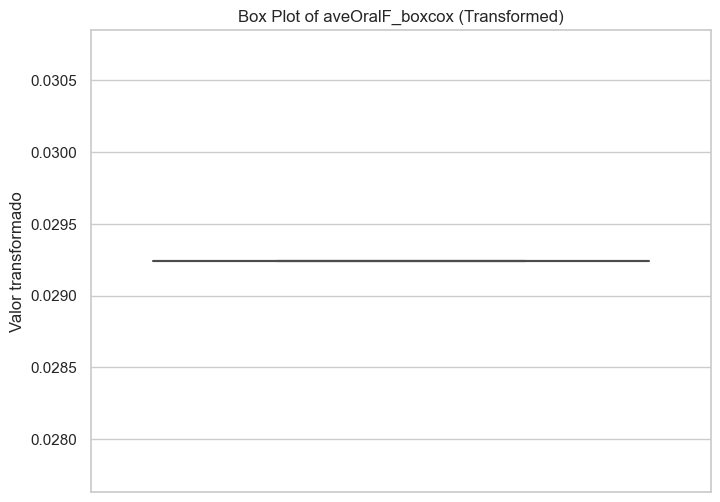


Outliers in 'Distance_boxcox':
     aveOralF_boxcox  Distance_boxcox  Date_yeo  aveOralM_boxcox  \
0           0.029241        -0.100211  0.409205          0.04012   
1           0.029241        -0.100211  0.409205          0.04012   
2           0.029241        -0.100211  0.409205          0.04012   
3           0.029241        -0.100211  0.409205          0.04012   
4           0.029241        -0.100211  0.409205          0.04012   
..               ...              ...       ...              ...   
344         0.029241        -0.103652  0.043389          0.04012   
348         0.029241        -0.103652  0.362529          0.04012   
350         0.029241        -0.103652  0.362529          0.04012   
351         0.029241        -0.103652  0.442536          0.04012   
389         0.029241        -0.100211  1.248797          0.04012   

     Humidity_boxcox  T_atm_boxcox  promedio_Max1R13__boxcox  \
0           2.768298      0.864463                  0.080249   
1           2.717555   

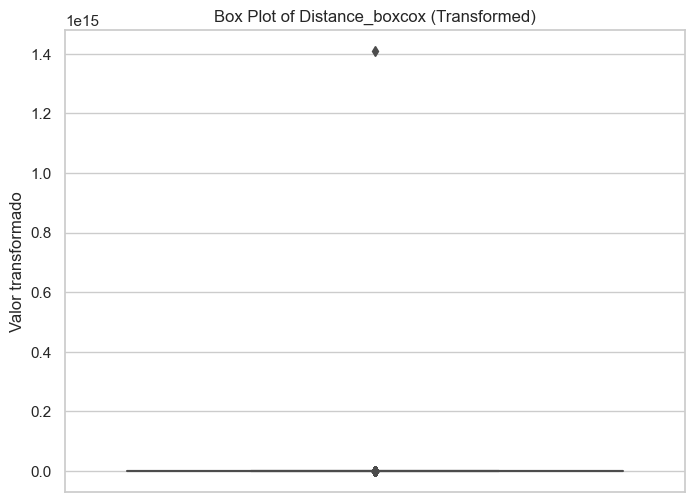


Outliers in 'Date_yeo':
     aveOralF_boxcox  Distance_boxcox  Date_yeo  aveOralM_boxcox  \
15          0.029241        -0.100211 -3.419610          0.04012   
16          0.029241        -0.100211 -3.419610          0.04012   
264         0.029241        -0.108827 -3.423223          0.04012   
265         0.029241        -0.108827 -3.423223          0.04012   
266         0.029241        -0.108827 -3.423223          0.04012   
267         0.029241        -0.115343 -3.423223          0.04012   
268         0.029241        -0.115978 -3.423223          0.04012   
269         0.029241        -0.112284 -3.417817          0.04012   
270         0.029241        -0.112284 -3.417817          0.04012   
271         0.029241        -0.103652 -3.417817          0.04012   
272         0.029241        -0.112284 -3.417817          0.04012   
273         0.029241        -0.116476 -3.417817          0.04012   
274         0.029241        -0.112284 -3.417817          0.04012   
275         0.029241   

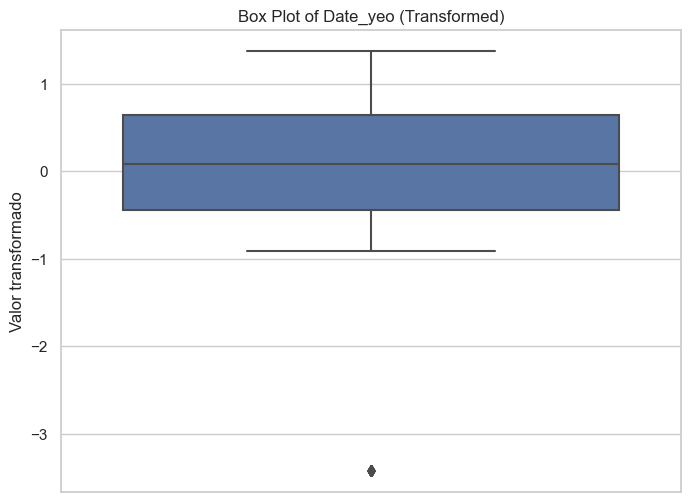


Outliers in 'aveOralM_boxcox':
No se detectaron outliers.


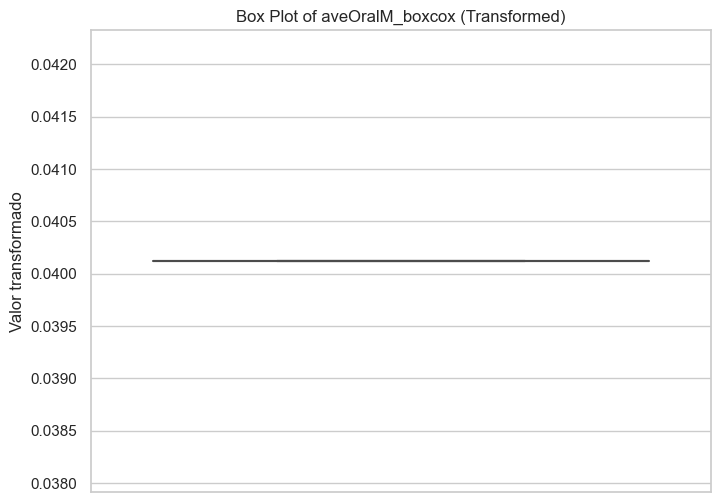


Outliers in 'Humidity_boxcox':
No se detectaron outliers.


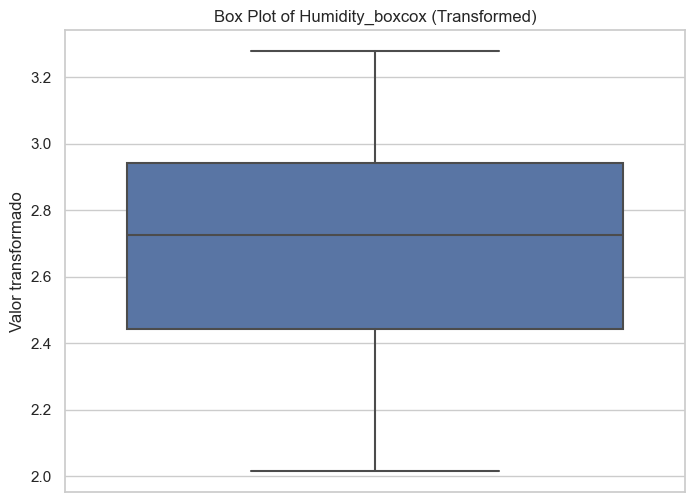


Outliers in 'T_atm_boxcox':
      aveOralF_boxcox  Distance_boxcox  Date_yeo  aveOralM_boxcox  \
298          0.029241        -0.112284 -0.589056          0.04012   
307          0.029241        -0.115978 -0.589056          0.04012   
308          0.029241        -0.113536 -0.589056          0.04012   
342          0.029241        -0.103652  0.043389          0.04012   
343          0.029241        -0.103652  0.043389          0.04012   
...               ...              ...       ...              ...   
1003         0.029241        -0.112284  0.844564          0.04012   
1005         0.029241        -0.112284  0.844564          0.04012   
1006         0.029241        -0.112284  0.844564          0.04012   
1007         0.029241        -0.112284  0.844564          0.04012   
1017         0.029241        -0.116476 -0.817389          0.04012   

      Humidity_boxcox  T_atm_boxcox  promedio_Max1R13__boxcox  \
298          2.841621      0.867559                  0.080249   
307         

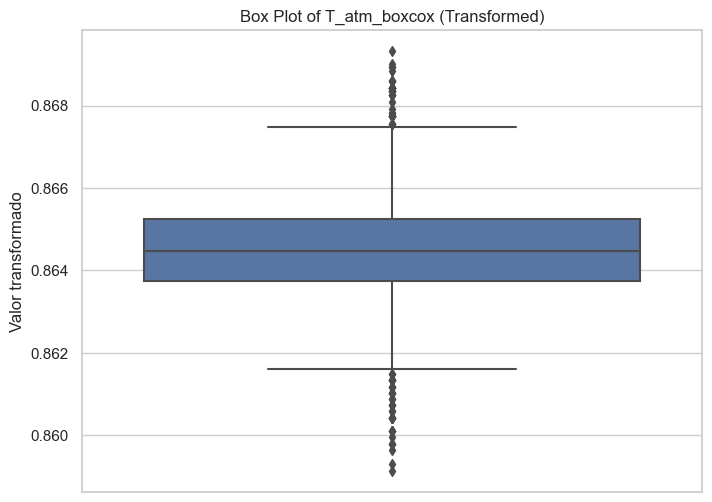


Outliers in 'promedio_Max1R13__boxcox':
No se detectaron outliers.


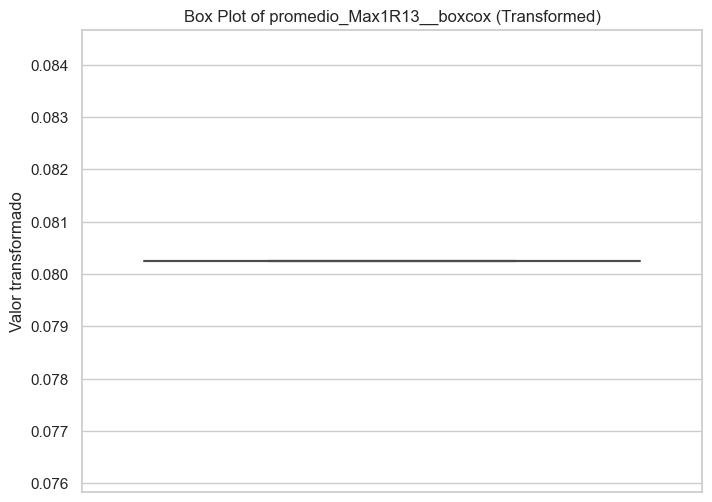


Outliers in 'Prom_Max1L13_boxcox':
No se detectaron outliers.


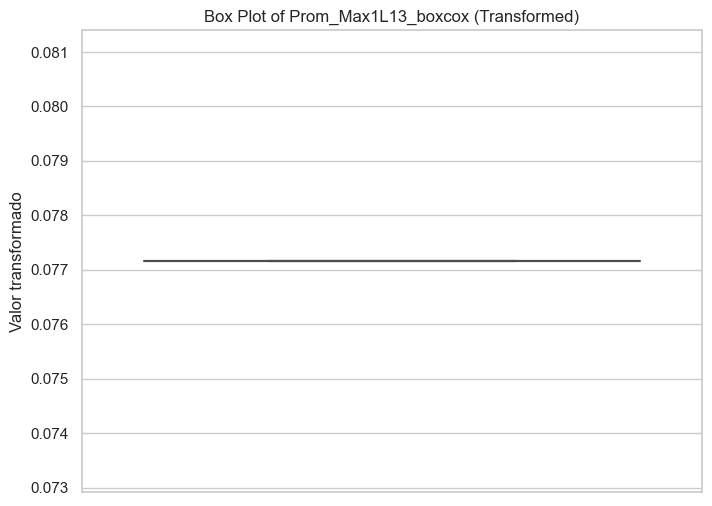


Outliers in 'Prom_T_Max_boxcox':
No se detectaron outliers.


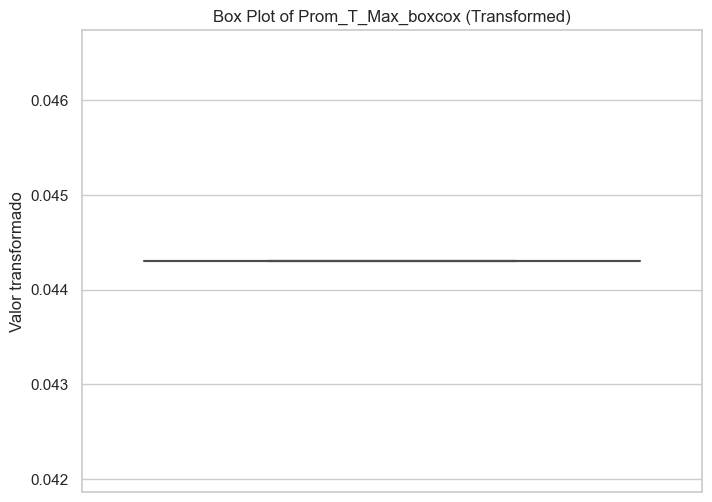


Outliers in 'Prom_TF_HCC_boxcox':
     aveOralF_boxcox  Distance_boxcox  Date_yeo  aveOralM_boxcox  \
81          0.029241        -0.112284 -0.444567          0.04012   
93          0.029241        -0.105141 -0.365776          0.04012   
99          0.029241        -0.103652 -0.286636          0.04012   
122         0.029241        -0.112284  0.189737          0.04012   
132         0.029241        -0.116242  0.269507          0.04012   
149         0.029241        -0.116476  0.831321          0.04012   
156         0.029241        -0.116242  0.831321          0.04012   
159         0.029241        -0.110734  0.911921          0.04012   
166         0.029241        -0.114067 -0.908574          0.04012   
215         0.029241        -0.115978  0.275850          0.04012   
230         0.029241        -0.107718  0.837501          0.04012   
261         0.029241        -0.114541  1.322984          0.04012   
272         0.029241        -0.112284 -3.417817          0.04012   
292         0

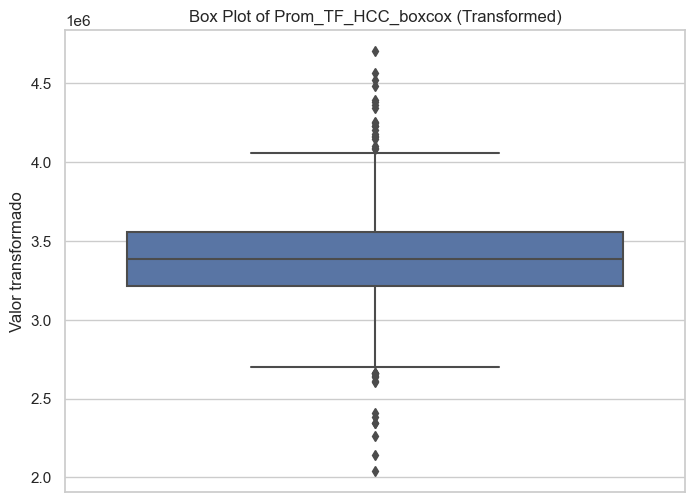

In [17]:
# 5. Outlier Detection and Visualization (AFTER transformation)   NADA MÁS PARA VER SI CUMPLIÓ LA TRANSFORMACIÓN :)
def detect_and_visualize_outliers(df, transformed_df):
    for col in transformed_df.columns:
        # IQR Method
        Q1 = transformed_df[col].quantile(0.25)
        Q3 = transformed_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = transformed_df[(transformed_df[col] < lower_bound) | (transformed_df[col] > upper_bound)]
        print(f"\nOutliers in '{col}':")
        if outliers.empty:
            print("No se detectaron outliers.")
        else:
            print(outliers)

        # Box Plot Visualization
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=transformed_df[col])  # Use seaborn for better aesthetics
        plt.title(f'Box Plot of {col} (Transformed)')
        plt.ylabel('Valor transformado')
        plt.show()

detect_and_visualize_outliers(t, df_transformado)

## PUNTO 2: TIPO DE EXPERIMENTO 

Para identificar el tipo de experimento que estamos analizando, debemos tener en cuenta los elementos del experimento y sus principios de diseño. A continuación se enuncian los diferentes factores que fueron tomados en cuenta para implementar este experimento.

1. Elementos del experimento
- Entradas: Sujetos, que en este caso son los pacientes a los que se les tomó la temperatura corporal.

2. Factores controlables
- Los termógrafos infrarrojos 

-Ubicaciones faciales donde se extrajo la temperatura: Se toma en cuenta, ya que en el estudio se mira el impacto de la zona facial en la que se determina la temperatura

-Temperatura ambiente: como el estudio se realizó con diferentes temperaturas ambientales, entonces es un factor que se controla.

3. Factores No controlables: Son específicas del sujeto y son inherentes a las demás variables

-Género: Se estudia como los factores hormomales pueden provocar la variación de la distribución en la cara entre ambos géneros.

-Edad: La fisiología de la piel y la regulación de la temperatura cambian con la edad, lo que afecta las temperaturas basales y las respuestas.

-Etnia: La pigmentación de la piel puede influir en las lecturas de los termómetros infrarrojos (IRT)

-Uso de cosméticos: Los cosméticos forman una capa aislante en la piel, que puede alterar la precisión de las mediciones de los IRTs.

4. Variables de Respuesta:
-Mediciones de temperatura oral (aveORALM y aveORALF)

-Temperaturas faciales medidas por los IRTs, extraídas de diferentes ubicaciones faciales: (Temperatura máxima en toda la región facial T_Max y temperatura promedio dentro de regiones faciales específicas T_RC y T_CL)

5. Principios en el Diseño del Experimento

- Aleatorización: Para evitar los sesgos en el estudio, se pueden tomar en cuenta el orden en el que se toman las mediciones para reducir el efecto de los factores relacionados con el tiempo. Además, se debe considerar la ubicación de la medición con el fin de ver como influye la zona en la que se está midiendo la temperatura debido a posibles diferencias en la fisiología o factores ambientales.

-Replicación: En el estudio, se examinaron más mil sujetos. Esto proporciona una amplia replicación y brinda mayor capacidad para análisis estadísticos y generalización de los resultados.
Por otro lado, se presentan mediciones repetidas de la temperatura, por lo que se puede evaluar la variación en el experimento.

-Bloqueo: Como hay variables categóricas que hacen parte de los factores no controlables y que estratifican a la población, se puede decir que hay bloqueos en el experimento.


Como en el estudio se compara la temperatura oral con las temperaturas faciales y vamos a tomar una hipótesis paramétrica, se realizará una prueba ANOVA, la cual nos permite hacer comparaciones entre las medias de las dos variables. De este modo, tenemos las siguientes hipótesis: 

H0: Las medias de temperatura son iguales entre todos los métodos de medición.

H1: Al menos un método difiere significativamente de los demás.

## Prueba ANOVA
Para realizar esta prueba, se debe cumplir primero con diferentes supuestos

In [18]:
#Vamos a comprobar normalidad entre los datos

#Las temperaturas que se usan en este proyecto para comparar con la tempertaura oral son:
columna1 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
columna2 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1)
columna3 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1)
columna4 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1)

#VARIBALE DE aveORALM
list_1=df['aveOralM'].tolist()

#Se utiliza la prueba de normalidad de Kolmogorov-Smirnof ya que los datos son mayores a 50
def test_normalityKS(data, variable): 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")

test_normalityKS(columna1, 'Promedio de Max1R13_')
test_normalityKS(columna2, 'Promedio de Max1L13_')
test_normalityKS(columna3, 'Promedio de T_Max_')
test_normalityKS(columna4, 'Promedio de T_FHCC_')
test_normalityKS(list_1, 'Variable aveORALM')

#PD: YA NO SÉ SI TOMAR EL DATAFRAME TRANSFORMADO O SEGUIR HACIENDO PRUEBA DE NORMALIDAD AJAJA :C


 Análisis de normalidad por Kolmogorov-Smirnov para 'Promedio de Max1R13_'
 Estadístico = 0.0739, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Promedio de Max1L13_'
 Estadístico = 0.0689, p-valor = 0.0001

 Análisis de normalidad por Kolmogorov-Smirnov para 'Promedio de T_Max_'
 Estadístico = 0.0997, p-valor = 0.0000

 Análisis de normalidad por Kolmogorov-Smirnov para 'Promedio de T_FHCC_'
 Estadístico = 0.0522, p-valor = 0.0074

 Análisis de normalidad por Kolmogorov-Smirnov para 'Variable aveORALM'
 Estadístico = 0.1731, p-valor = 0.0000
